# Задание к выпускной квалификационной работе
# по курсу «Data Science»

### Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов). 
### Описание: 
Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться растяжению, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).
Актуальность: Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
Датасет со свойствами композитов. Объединение делать по индексу тип объединения INNER
https://drive.google.com/file/d/1B1s5gBlvgU81H9GGolLQVw_SOi-vyNf2/view?usp=sharing

### Требуется:
1)	Изучить теоретические основы и методы решения поставленной задачи.

2)	Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонки получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.

3)	Провести предобработку данных (удаление шумов, нормализация и т.д.).

4)	Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

5)	Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

6)	Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

7)	Оценить точность модели на тренировочном и тестовом датасете.

8)	Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.


### Задача 5

# Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
%matplotlib inline

In [3]:
# путь к данным, файл полученные после объединения файлов X_bp.xlsx и X_nup.xlsx, 
# анализа на пропуски, дубликаты, отрицательные и равные нулю физические значения исследуемых переменных
# удаления выбросов
Data_path  = "Data\X_nup_inner_bp.xlsx"

In [4]:
# загрузка из эксель-файла
df  = pd.read_excel(Data_path,  index_col=0)

In [5]:
# посмотрим содержимое датасета (выведем для просмотра первые пять строк)

In [6]:
df.head().T

,1,3,4,5,6
Соотношение матрица-наполнитель,1.857143,1.857143,2.771331,2.767918,2.569620
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2000.000000,1910.000000
"модуль упругости, ГПа",738.736842,738.736842,753.000000,748.000000,807.000000
"Количество отвердителя, м.%",50.000000,129.000000,111.860000,111.860000,111.860000
"Содержание эпоксидных групп,%_2",23.750000,21.250000,22.267857,22.267857,22.267857
"Температура вспышки, С_2",284.615385,300.000000,284.615385,284.615385,284.615385
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000


In [7]:
# посмотрим размер датасета

In [8]:
df.shape

(921, 14)

In [9]:
# информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       921 non-null    float64
 1   Плотность, кг/м3                      921 non-null    float64
 2   модуль упругости, ГПа                 921 non-null    float64
 3   Количество отвердителя, м.%           921 non-null    float64
 4   Содержание эпоксидных групп,%_2       921 non-null    float64
 5   Температура вспышки, С_2              921 non-null    float64
 6   Поверхностная плотность, г/м2         921 non-null    float64
 7   Модуль упругости при растяжении, ГПа  921 non-null    float64
 8   Прочность при растяжении, МПа         921 non-null    float64
 9   Потребление смолы, г/м2               921 non-null    float64
 10  Шаг нашивки                           921 non-null    float64
 11  Плотность нашивки 

In [10]:
# Посмотрим описательную статистику по датасету
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,921.0,2.927987,0.895958,0.547391,2.319322,2.908787,3.550038,5.314144
"Плотность, кг/м3",921.0,1974.076438,71.067625,1784.482245,1923.255135,1977.302956,2020.108384,2161.565216
"модуль упругости, ГПа",921.0,735.845364,327.678809,2.436909,498.519344,734.763985,956.906660,1628.000000
"Количество отвердителя, м.%",921.0,111.139456,26.767566,38.668500,92.834720,111.166301,130.163998,181.828448
"Содержание эпоксидных групп,%_2",921.0,22.200385,2.395220,15.695894,20.555344,22.177332,23.957502,28.955094
"Температура вспышки, С_2",921.0,286.210649,39.431984,179.374391,259.224491,286.302097,313.023467,386.067992
"Поверхностная плотность, г/м2",921.0,482.917197,280.197532,0.603740,264.538975,458.556445,695.845999,1291.340115
"Модуль упругости при растяжении, ГПа",921.0,73.305807,3.026672,65.793845,71.252628,73.253725,75.310287,81.203147
"Прочность при растяжении, МПа",921.0,2460.196046,452.101798,1250.392802,2147.576085,2455.555556,2751.228051,3636.892992
"Потребление смолы, г/м2",921.0,217.961148,57.107510,72.530873,179.858423,218.448971,256.283235,359.052220


In [11]:
# Еще раз взглянем на статистику датасета
# Что не нравится?
# - модуль упругости, минимальное значение 2.436909 , а максимальное 1628.000000
# - поверхностная плотность, минимальное значение 0.603740 , а максимальное 1291.340115
# - шаг нашивки, минимальное значение 0.037639, а максимальное 13.732404
# - cоотношение матрица-наполнитель - есть значения как меньше единыцы, так и больше

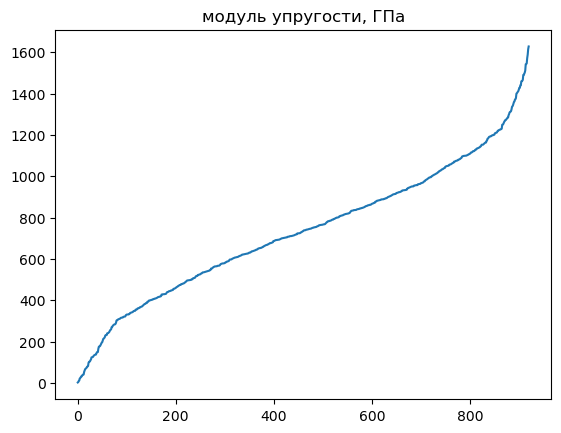

In [12]:
# график переменной, значения отсортированы по возрастанию
plt.title("модуль упругости, ГПа")
plt.plot(np.sort(pd.array(df['модуль упругости, ГПа'])))

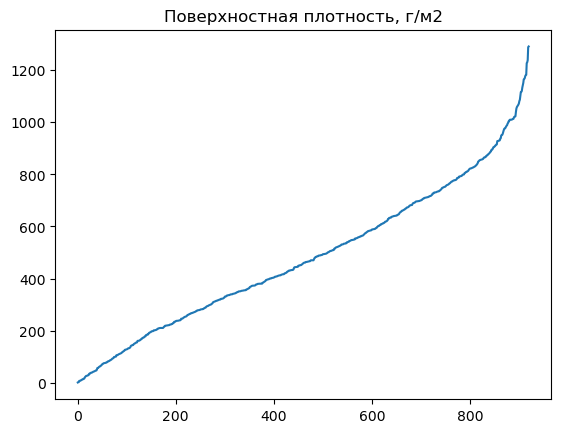

In [13]:
plt.title("Поверхностная плотность, г/м2")
plt.plot(np.sort(pd.array(df['Поверхностная плотность, г/м2'])))

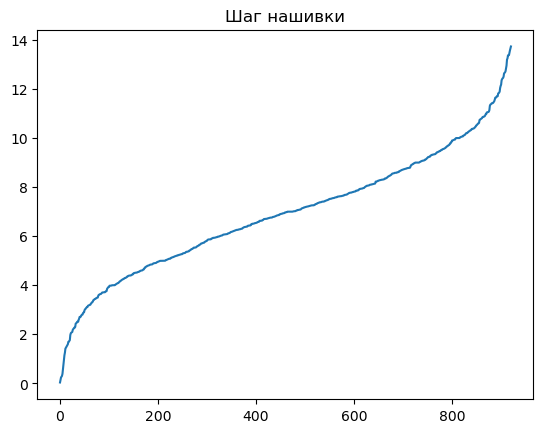

In [14]:
plt.title("Шаг нашивки")
plt.plot(np.sort(pd.array(df['Шаг нашивки'])))

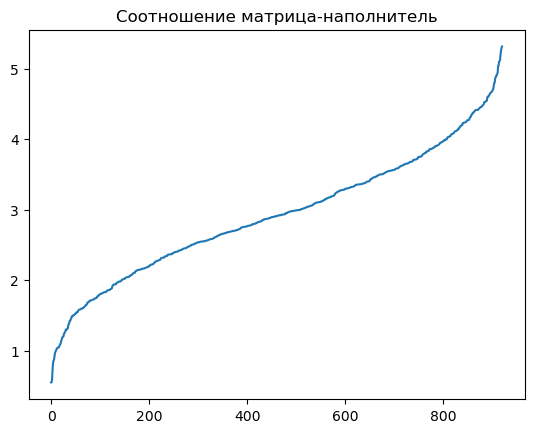

In [15]:
plt.title("Соотношение матрица-наполнитель")
plt.plot(np.sort(pd.array(df['Соотношение матрица-наполнитель'])))

In [16]:
# посмотрим количество значений "Соотношение матрица-наполнитель" меньше 1
df.loc[df['Соотношение матрица-наполнитель'] <= 1]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, 0 град","Угол нашивки, 90 град"
402,0.551508,1934.555670,470.619155,119.503474,23.095187,332.123415,396.847568,73.797618,2687.995919,166.087942,8.749852,47.176345,1,0
538,0.857381,2038.898460,524.684773,105.128512,19.795821,218.491902,354.985787,72.406178,2313.676959,289.349833,10.740492,49.158838,1,0
785,0.547391,1931.739832,124.507732,121.151346,22.667522,277.948292,609.004377,76.072252,2486.698093,262.937031,6.555170,60.322365,0,1
820,0.596783,1930.389172,789.798256,64.812581,20.749293,264.844169,589.344541,78.598663,2051.958320,307.363639,11.046367,68.112439,0,1
837,0.986746,1998.058473,1048.800952,137.936243,28.955094,292.986330,341.576222,71.673907,2754.515879,163.684493,3.715391,55.747609,0,1
861,0.875458,2021.354918,844.593735,79.199404,23.112373,251.490126,6.779255,72.098615,2793.115364,143.908879,4.994143,60.903531,0,1
890,0.927841,1952.857390,304.058314,105.938449,24.791859,318.140519,386.789237,72.221529,2640.186903,84.490129,8.299720,59.563595,0,1
925,0.827016,1920.051313,753.465777,106.790625,21.203769,270.244342,260.479216,74.995439,1646.220592,188.628413,6.231992,59.239052,0,1
933,0.749223,1957.475842,339.749224,117.964025,23.110371,385.894771,153.760597,76.292711,2391.972949,234.213529,7.931104,48.731020,0,1
972,0.998971,2003.841846,501.504307,157.818752,20.350601,261.670290,928.179874,74.769351,3375.202764,182.599404,7.219647,60.980006,0,1


In [17]:
# когда Соотношение матрица-наполнитель меньше 1, это получается, что наполнителя больше чем основного вещества,
# и тогда получается, что наполнитель это уже основное вещество ? А в этом случае это другой класс материалов?
# предлагаю убрать из рассмотрения такие значения (когда Соотношение матрица-наполнитель меньше 1)

In [18]:
# удалим значения Соотношение матрица-наполнитель которые меньше 1
df = df.loc[df['Соотношение матрица-наполнитель'] >= 1]
df.shape

(910, 14)

In [19]:
# посмотрим количество значений "Шаг нашивки" меньше 1
df.loc[df['Шаг нашивки'] <= 1].head(100)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, 0 град","Угол нашивки, 90 град"
104,2.403428,2018.959131,9.986210,59.174654,22.501117,318.192405,108.448229,69.115762,2363.294546,222.307307,0.239660,69.153352,1,0
160,2.314541,2005.151555,905.473601,81.793370,25.179894,265.652005,219.876245,74.925555,2053.646797,239.280576,0.390191,51.570139,1,0
216,2.509977,1912.215145,1056.096385,87.198840,21.883152,252.331069,781.355358,71.555460,2029.147825,206.428712,0.145034,54.138756,1,0
278,2.532323,1999.044769,1074.654861,119.121467,20.910835,311.590219,583.860102,70.398562,2127.901282,156.575265,0.939462,78.429083,1,0
493,2.068641,2014.797981,1083.186235,87.842144,22.178914,250.472074,554.583489,72.747541,2160.577394,118.670841,0.571835,36.628878,1,0
497,3.016343,2079.295010,1122.119595,105.588808,25.181815,268.548003,292.979124,70.199234,2347.135204,166.876118,0.730260,84.015247,1,0
584,2.163567,1913.021899,606.244186,129.246402,19.292115,348.597738,493.708023,72.638695,1901.323144,204.324648,0.268756,75.340929,0,1
674,3.858755,2053.292814,985.791212,59.207283,22.403912,299.670865,432.572807,74.837967,2057.493213,143.693207,0.305723,73.389838,0,1
936,2.807028,2029.296906,993.859728,74.690667,27.292550,226.555876,547.516759,71.680994,2528.082238,220.732220,0.037639,59.156843,0,1


In [20]:
# из представленных значений, смущает значение, с шагом нашивки меньшим 0.1
# но, предлагаю удалить значения Шаг нашивки, которые меньше 1, потому как не понятен порядок значений в целом
# как может быть шаг нашивки такой маленький, при том, что большинство данных находятся в промежутке от 2 до 12
df = df.loc[df['Шаг нашивки'] >= 1]
df.shape

(901, 14)

In [21]:
# посмотрим количество значений "Поверхностная плотность, г/м2" меньше 10
df.loc[df['Поверхностная плотность, г/м2'] <= 10].head(100)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, 0 град","Угол нашивки, 90 град"
81,3.711676,1835.946065,1312.266502,115.495390,24.167632,259.258201,7.095354,75.063222,2840.934853,228.508653,5.764377,73.353526,1,0
180,2.989538,1947.952167,240.142590,110.615466,21.031069,342.168045,0.603740,72.146360,1680.971057,278.194759,4.904485,49.898567,1,0
367,2.717755,2092.178750,21.771994,48.087114,26.105167,289.494401,8.460317,71.617030,2680.194401,212.637811,6.117312,45.541835,1,0
528,3.482206,1972.320285,1144.216057,133.821004,23.059778,323.411151,1.668002,69.668358,1676.226034,165.884660,6.703324,54.588162,1,0
604,3.578784,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,73.006935,1399.118555,160.519027,10.264664,73.738350,0,1
607,2.750998,2062.143965,405.974023,104.992165,21.668841,268.465153,6.986693,74.082320,2685.676163,154.908809,5.802016,69.435663,0,1
672,1.790057,2090.151721,354.926997,136.056488,20.833855,298.220078,1.894093,73.613409,1661.499549,296.370696,9.057567,68.253199,0,1


In [22]:
# из представленных значений, смущают значения, с Поверхностная плотность меньше 2
# предлагаю удалить значения Поверхностная плотность, которые меньше 2, 
df = df.loc[df['Поверхностная плотность, г/м2'] >= 2]
df.shape

(898, 14)

In [23]:
# посмотрим количество значений "модуль упругости, ГПа" меньше 10
df.loc[df['модуль упругости, ГПа'] <= 10].head(100)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, 0 град","Угол нашивки, 90 град"
487,2.920376,2087.646817,4.339154,76.784021,18.552220,258.302450,68.508119,74.062349,2475.645729,237.850070,10.466131,82.525493,1,0
520,2.699188,2039.344180,2.436909,116.365766,24.921719,223.057932,697.411809,71.979322,2657.645298,187.868789,4.590618,50.328563,1,0


In [24]:
# предлагаю удалить значения модуль упругости, ГПа, которые меньше 10 
df = df.loc[df['модуль упругости, ГПа'] >= 10]
df.shape

(896, 14)

# Диаграммы "ящика с усами"

In [25]:
# Ящик с усами (диаграмма размаха, усиковая диаграмма, коробчатая диаграмма).
# Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили,
# минимальное и максимальное значение выборки и выбросы

In [26]:
import math
import seaborn as sns
sns.set(font_scale=1.5)

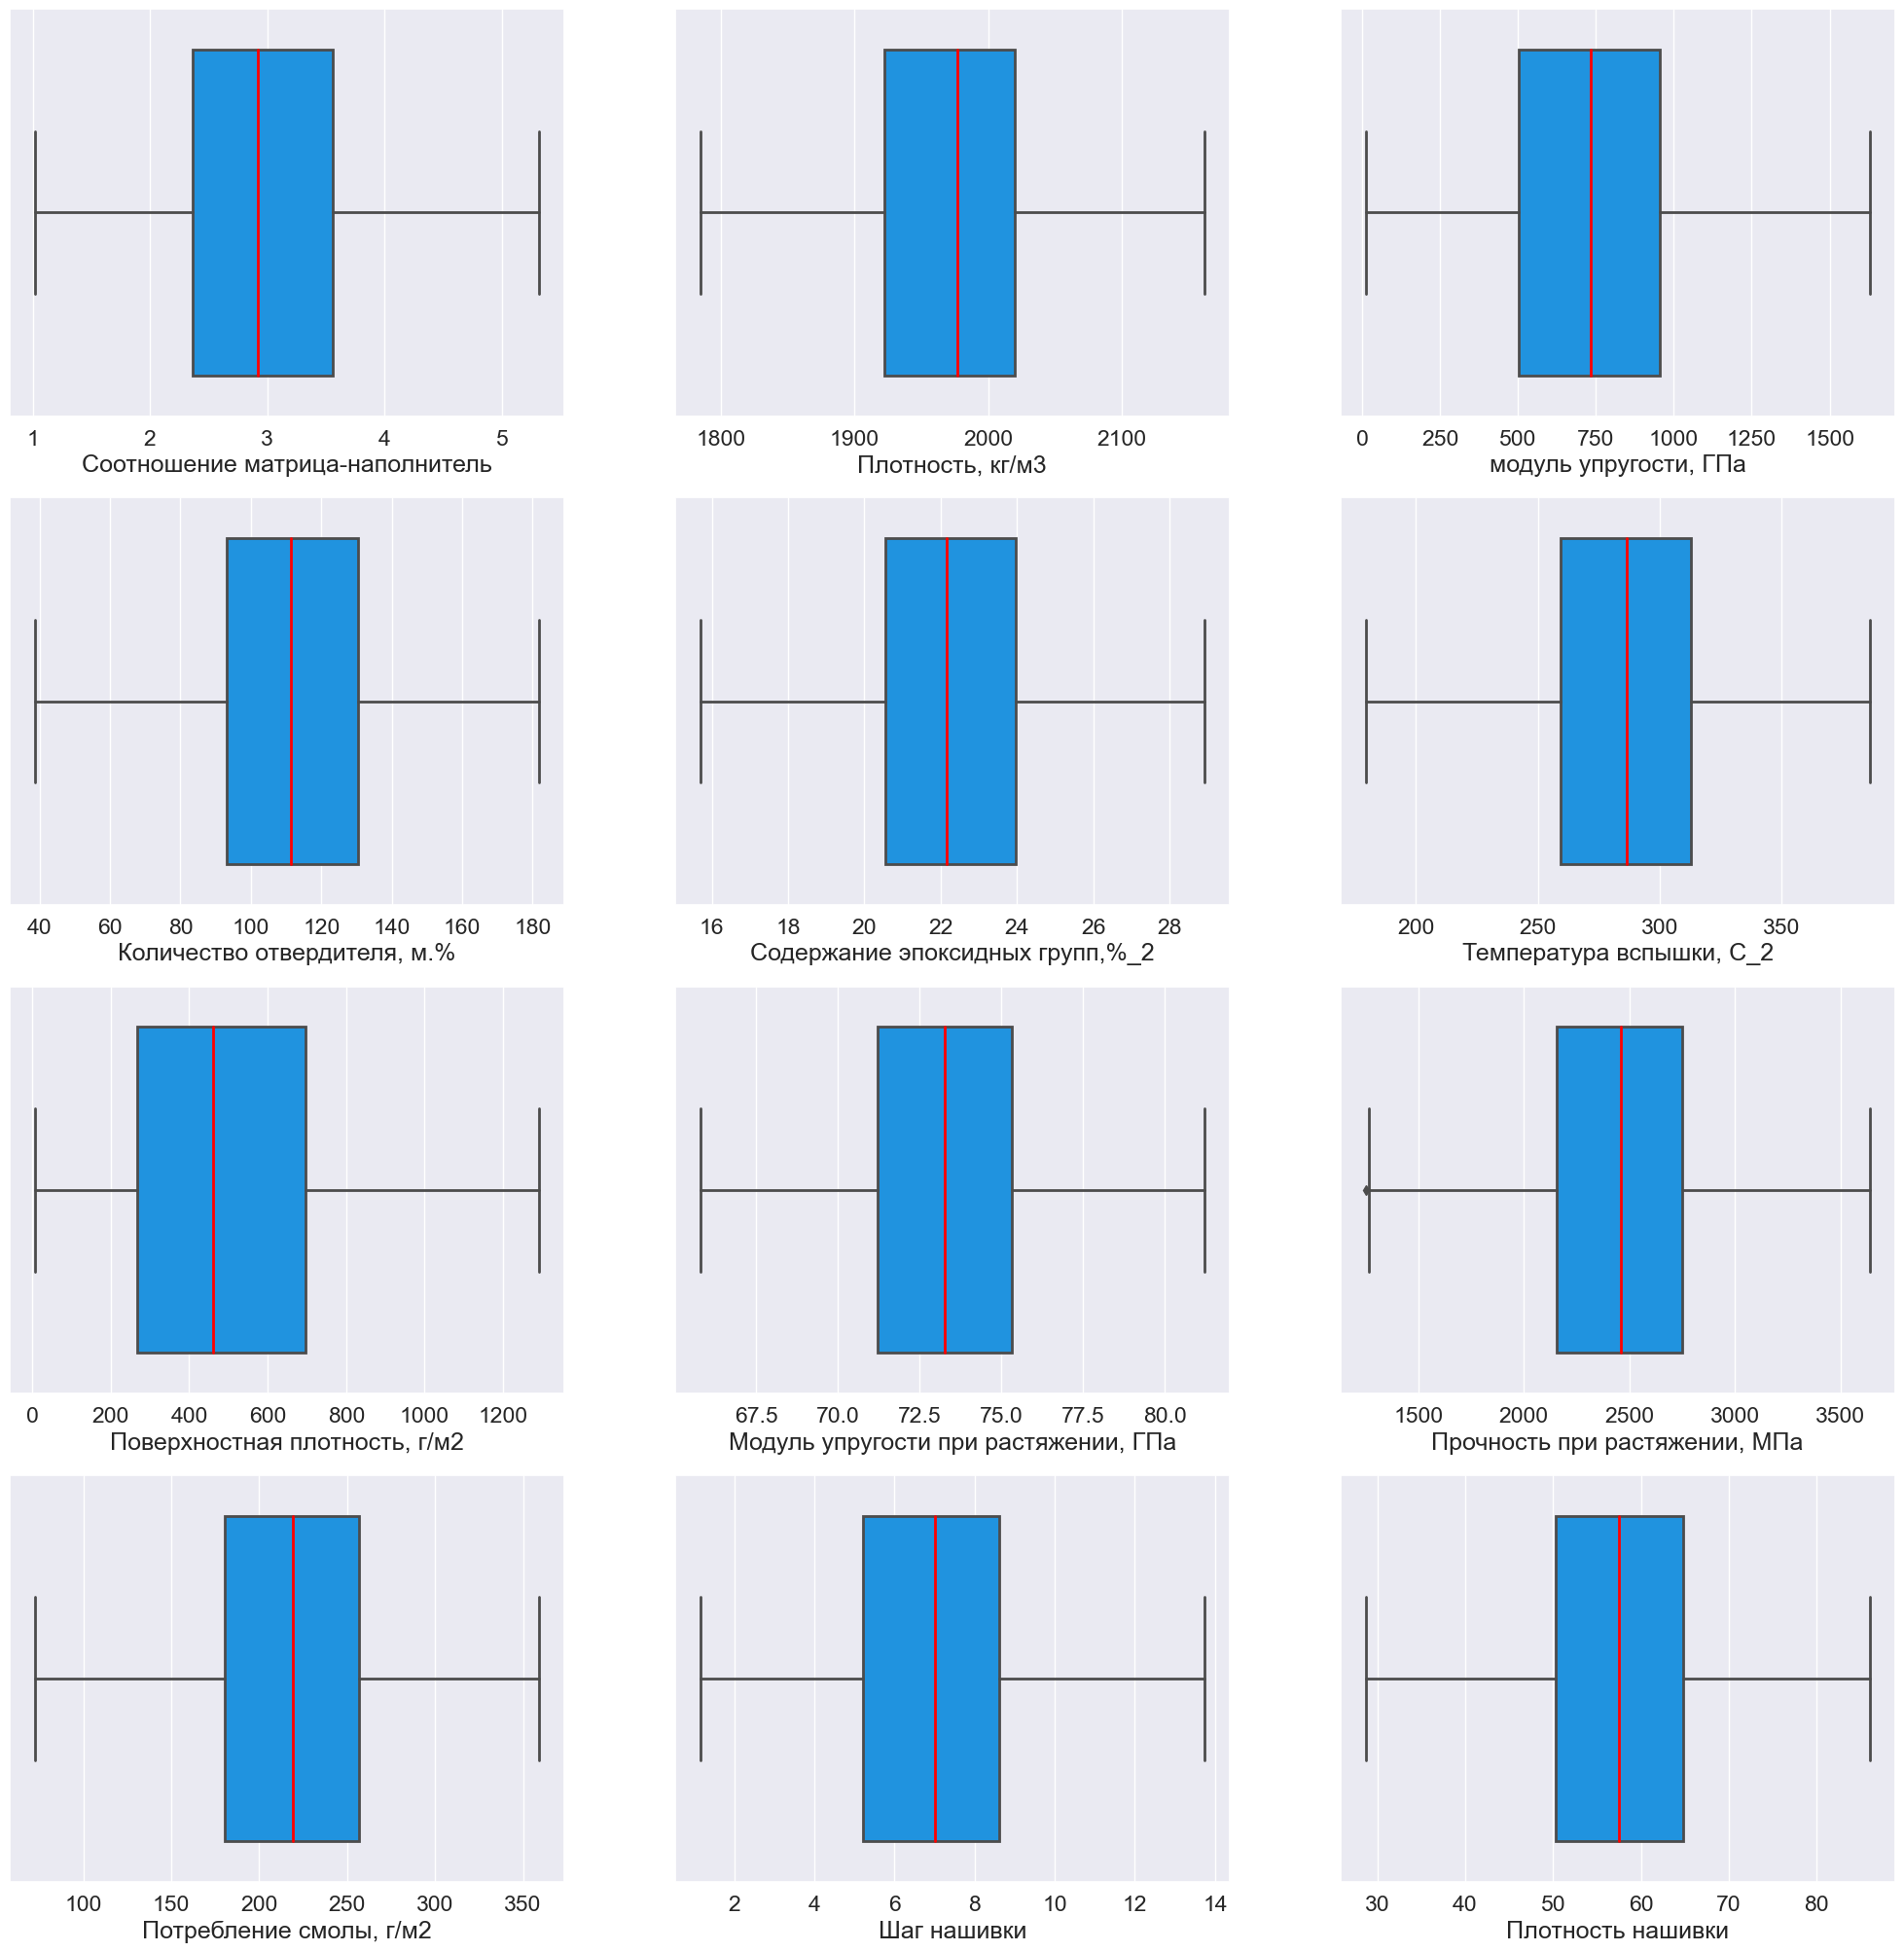

In [27]:
i = 1 # номер столбца (при отсчете от единицы, а не нуля)
Num_col = df.columns.shape[0] - 2 # количество столбцов без последних двух (без углов нашивки)
plt.figure(figsize = (25,25))
for df_col_num in df.columns:
    plt.subplot(math.ceil(Num_col / 3), 3, i)
    sns.boxplot(x = df[df_col_num], color = "#0099FF", meanline = True, medianprops = dict(color = 'red'), linewidth = 2)
    plt.ylabel(None)
    i += 1
    if i > Num_col:
        break
plt.savefig('Images\Boxplot_neural.png')

In [28]:
# есть выброс в прочности при растяжении 

# Исключение выбросов

### Исключение выбросов - IQR (межквартильный диапазон)
Подход к поиску выбросов в интервале между квартилями является наиболее часто используемым и наиболее надежным подходом, используемым в области исследований.
IQR = Quartile3 – Quartile1

Для определения базового значения выбросов определяется выше и ниже нормального диапазона наборов данных,
а именно верхней и нижней границ, определяем верхнюю и нижнюю границы (учитывается значение 1,5 * IQR):
верхний = Q3 + 1,5 * IQR
нижний  = Q1 – 1,5 * IQR

In [29]:
# функция для определения выбросов методом IQR
def detect_outliers_IQR(data):
    outliers_value = []
    Q1 = np.percentile(data, 25, method = 'midpoint')
    Q3 = np.percentile(data, 75, method = 'midpoint')
    IQR = Q3 - Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    for i in data:
        if  i <= lower or i >= upper:
            outliers_value.append(i)
    return outliers_value

In [30]:
print("Значения выбросов определенных методом IQR: ")
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    print(f"{df_col_name:>40}", " - ", Outliers_value)

Значения выбросов определенных методом IQR: 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  []
                   модуль упругости, ГПа  -  []
             Количество отвердителя, м.%  -  []
         Содержание эпоксидных групп,%_2  -  []
                Температура вспышки, С_2  -  []
           Поверхностная плотность, г/м2  -  []
    Модуль упругости при растяжении, ГПа  -  []
           Прочность при растяжении, МПа  -  [1250.39280220501]
                 Потребление смолы, г/м2  -  []
                             Шаг нашивки  -  []
                       Плотность нашивки  -  []
                   Угол нашивки,  0 град  -  []
                   Угол нашивки, 90 град  -  []


In [31]:
# удалим выбросы методом IQR 
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    df = df[df[df_col_name].isin (Outliers_value) == False ]

In [32]:
# посмотрим размер датасета после удаления выбросов
df.shape

(895, 14)

In [33]:
# проверим еще раз наличие выбросов
print("Значения выбросов определенных методом IQR: ")
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    print(f"{df_col_name:>40}", " - ", Outliers_value)

Значения выбросов определенных методом IQR: 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  []
                   модуль упругости, ГПа  -  []
             Количество отвердителя, м.%  -  []
         Содержание эпоксидных групп,%_2  -  []
                Температура вспышки, С_2  -  []
           Поверхностная плотность, г/м2  -  []
    Модуль упругости при растяжении, ГПа  -  []
           Прочность при растяжении, МПа  -  []
                 Потребление смолы, г/м2  -  []
                             Шаг нашивки  -  []
                       Плотность нашивки  -  []
                   Угол нашивки,  0 град  -  []
                   Угол нашивки, 90 град  -  []


### ящик с усами для переменных после применения IQR

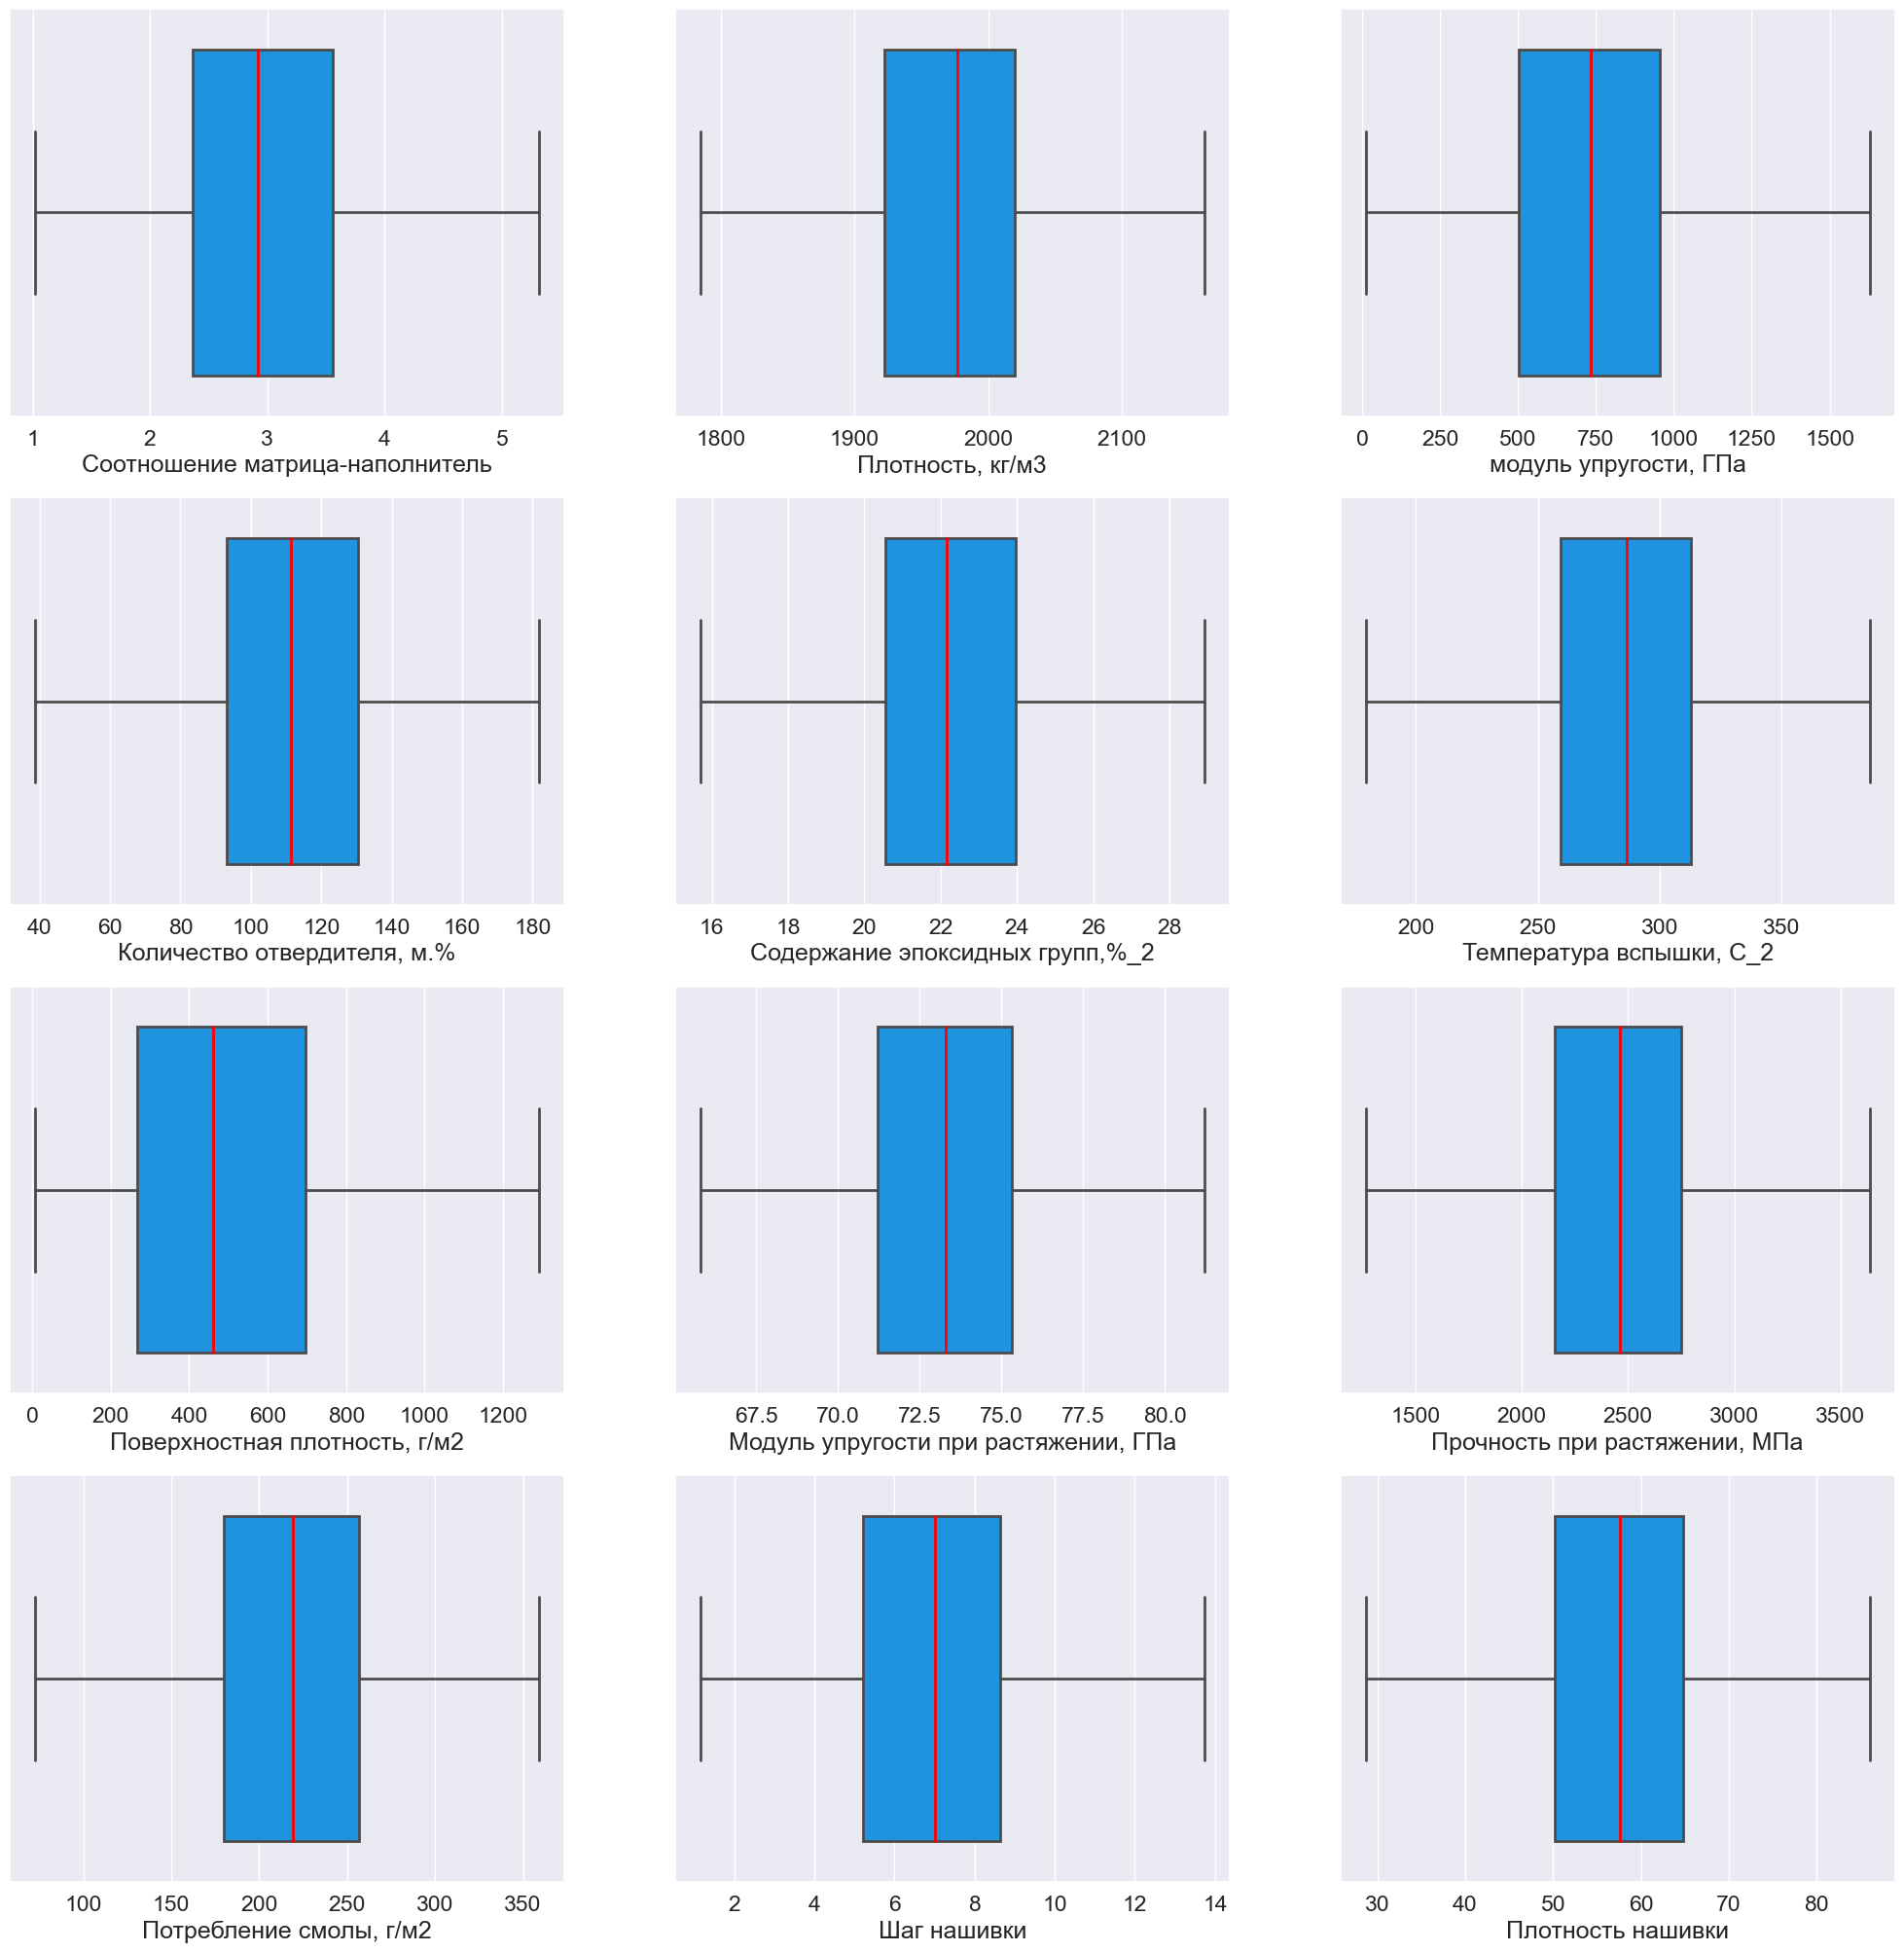

In [34]:
# после удаления выбросов посмотрим ящики с усами для каждой переменной (без углов нашивки)
i = 1 # номер столбца (при отсчете от единицы, а не нуля)
Num_col = df.columns.shape[0] - 2 # количество столбцов без последних двух (без углов нашивки)
plt.figure(figsize = (25,25))
for df_col_num in df.columns:
    plt.subplot(math.ceil(Num_col / 3), 3, i)
    sns.boxplot(x = df[df_col_num], color = "#0099FF", meanline = True, medianprops = dict(color = 'red'), linewidth = 2)
    plt.ylabel(None)
    i += 1
    if i > Num_col:
        break
plt.savefig('Images\Boxplot_neural_after_IQR.png')

In [35]:
# Посмотрим описательную статистику по датасету
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,895.0,2.958418,0.873977,1.019830,2.360651,2.919889,3.557018,5.314144
"Плотность, кг/м3",895.0,1973.574022,71.421369,1784.482245,1922.378281,1977.126504,2019.796983,2161.565216
"модуль упругости, ГПа",895.0,738.221007,325.697703,11.312943,501.613026,734.763985,955.521332,1628.000000
"Количество отвердителя, м.%",895.0,111.398418,26.747630,38.668500,93.162486,111.486478,130.358425,181.828448
"Содержание эпоксидных групп,%_2",895.0,22.189089,2.395006,15.695894,20.552784,22.148860,23.959367,28.907470
"Температура вспышки, С_2",895.0,286.200642,39.386088,179.374391,259.241346,286.308108,312.885525,386.067992
"Поверхностная плотность, г/м2",895.0,486.390449,280.070072,6.986693,267.682672,460.772122,696.733941,1291.340115
"Модуль упругости при растяжении, ГПа",895.0,73.321141,3.040770,65.793845,71.229278,73.284256,75.329893,81.203147
"Прочность при растяжении, МПа",895.0,2466.581856,450.594213,1264.310682,2156.264438,2460.997418,2751.881142,3636.892992
"Потребление смолы, г/м2",895.0,218.398936,57.121557,72.530873,180.146597,219.198882,256.760915,359.052220


In [36]:
# сохраним датасет в файл (резервирование данных)
df.to_excel("Data/X_nup_inner_bp_neural.xlsx")

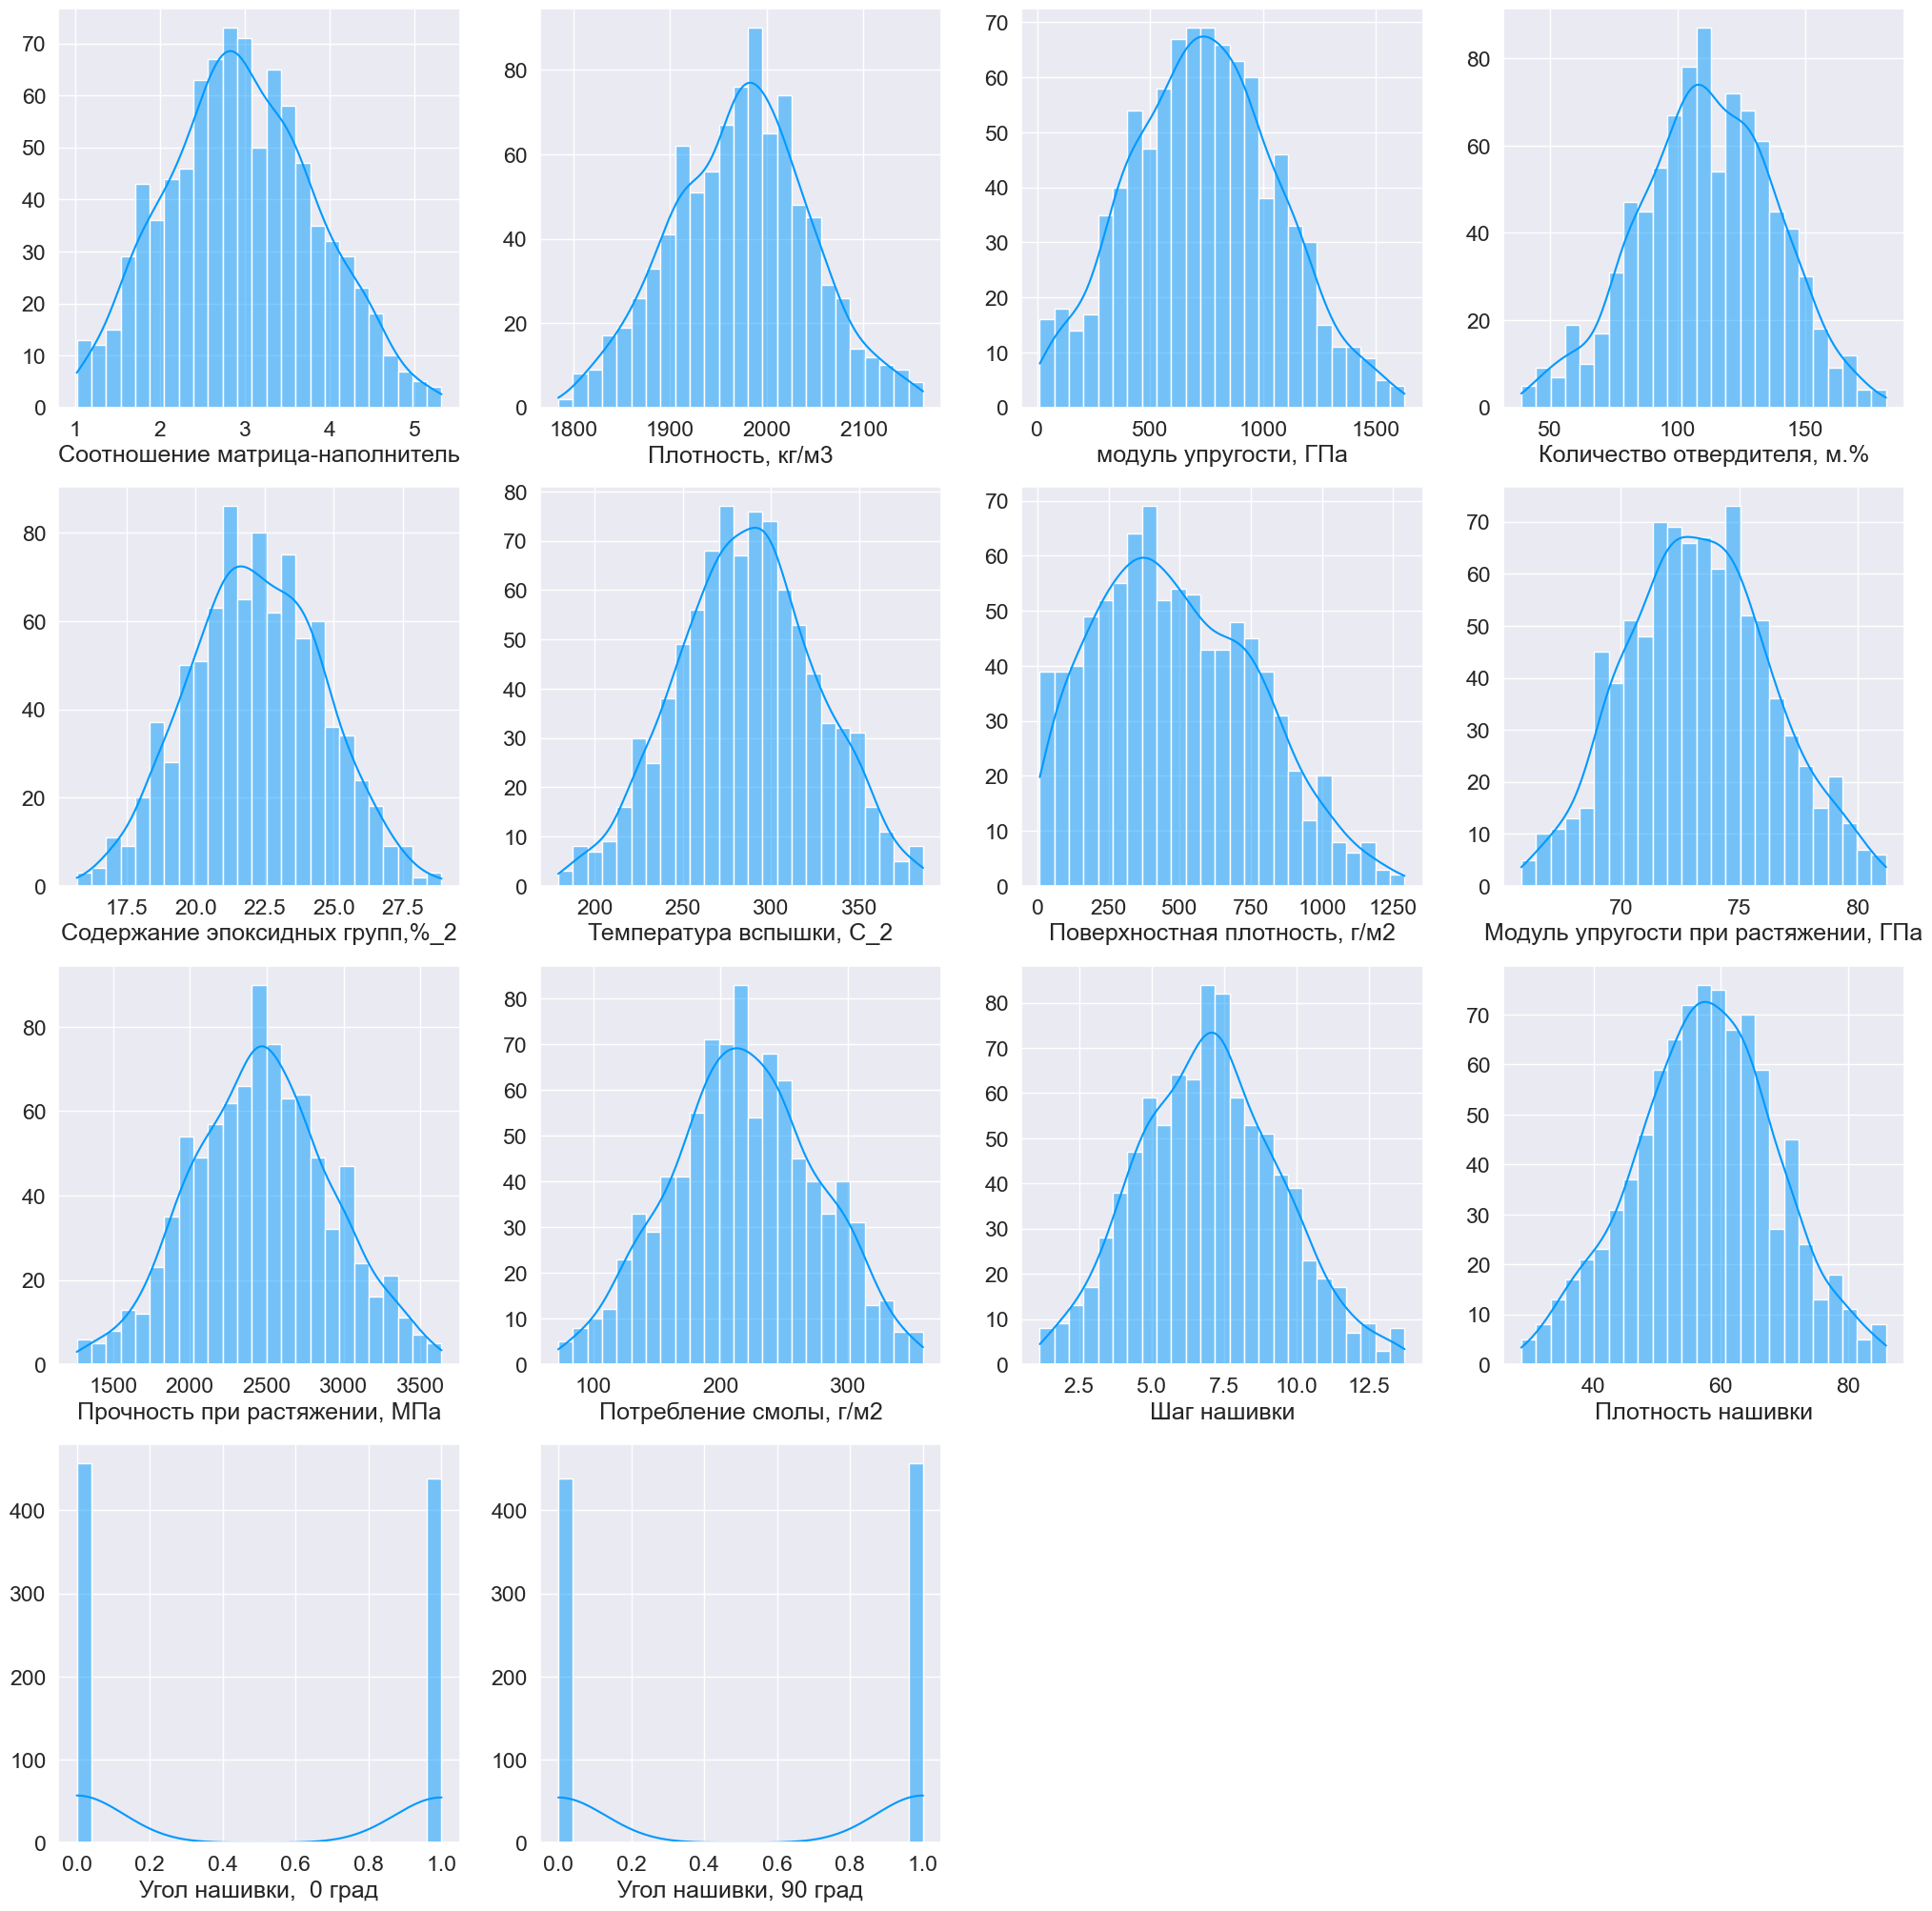

In [37]:
# Гистограммы распределения признаков с графиком распределения
i = 1
plt.figure(figsize = (25,25))
for df_col_num in df.columns:
    plt.subplot(4, 4, i)
    sns.histplot(data = df[df_col_num], kde=True, color = "#0099FF", bins = 25)
    plt.ylabel(None)
    i += 1
plt.savefig('Images\hist_neural.png')

# Нейронная сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [38]:
# выведем размерность
df.shape

(895, 14)

In [39]:
# посмотрим повторно описательную статистику
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,895.0,2.958418,0.873977,1.019830,2.360651,2.919889,3.557018,5.314144
"Плотность, кг/м3",895.0,1973.574022,71.421369,1784.482245,1922.378281,1977.126504,2019.796983,2161.565216
"модуль упругости, ГПа",895.0,738.221007,325.697703,11.312943,501.613026,734.763985,955.521332,1628.000000
"Количество отвердителя, м.%",895.0,111.398418,26.747630,38.668500,93.162486,111.486478,130.358425,181.828448
"Содержание эпоксидных групп,%_2",895.0,22.189089,2.395006,15.695894,20.552784,22.148860,23.959367,28.907470
"Температура вспышки, С_2",895.0,286.200642,39.386088,179.374391,259.241346,286.308108,312.885525,386.067992
"Поверхностная плотность, г/м2",895.0,486.390449,280.070072,6.986693,267.682672,460.772122,696.733941,1291.340115
"Модуль упругости при растяжении, ГПа",895.0,73.321141,3.040770,65.793845,71.229278,73.284256,75.329893,81.203147
"Прочность при растяжении, МПа",895.0,2466.581856,450.594213,1264.310682,2156.264438,2460.997418,2751.881142,3636.892992
"Потребление смолы, г/м2",895.0,218.398936,57.121557,72.530873,180.146597,219.198882,256.760915,359.052220


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# определим тренировочную и тестовую выборки
# целевая переменная "матрица-наполнитель"
target = "Соотношение матрица-наполнитель"

# параметры 
# test_size - значение с плавающей запятой, оно должно быть между 0.0 и 1.0 и представляет
# долю набора данных для включения в тестовое разделение.
# random_state - управляет перемешиванием, применяемым к данным перед применением разделения.

x_train, x_test, y_train, y_test = train_test_split(df.drop([target], axis=1), 
                                                    df[target],
                                                    test_size=0.2,                                                    
                                                    random_state=42,
                                                    shuffle=True)

In [42]:
# посмотрим размеры полученных выборок
print("размеры выборок:")
print("обучающая: ", x_train.shape)
print("тестовая : ", x_test.shape)
print("целевая переменная, обучающая: ", y_train.shape)
print("целевая переменная,  тестовая: ", y_test.shape)

размеры выборок:
обучающая:  (716, 13)
тестовая :  (179, 13)
целевая переменная, обучающая:  (716,)
целевая переменная,  тестовая:  (179,)


In [43]:
# максимальное значение во всем датасете
df_max_val = max(df.max())

In [44]:
# выполним нормирование, разделим все значение на максимальное во всем датасете
x_train_norm = np.array(x_train) / df_max_val
x_test_norm  = np.array(x_test)  / df_max_val

In [67]:
import tensorflow as tf
from tensorflow import keras

###### Создадим модель.
Модель будет состоять из keras.layers.Input - входного слоя и слоев keras.layers.Dense 
Это плотно связанные или полностью связанные нейронные слои.
Два слоя Dense содержит 169 узлов (или нейронов).
Третий (и последний) уровень — это предсказываемое значение.

In [68]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train_norm.shape[1],)), 
    keras.layers.Dense(169, activation=tf.nn.relu),
    keras.layers.Dense(169, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu)
])

Компилирование модели

Прежде чем модель будет готова к обучению, 
ей потребуется еще несколько настроек. Они добавляются во время этапа компиляции модели:

Loss function (функция потери) — измеряет насколько точная модель во время обучения
Optimizer (оптимизатор) — это то, как модель обновляется на основе данных, которые она видит
функции потери Metrics (метрики) — используется для контроля за этапами обучения и тестирования

In [69]:
# скомпилируем модель с разными оптимизаторами

In [70]:
# скомпилируем модель с оптимизатором Adam

In [71]:
#model.compile(optimizer=tf.optimizers.Adam(), 
#              loss='mean_squared_logarithmic_error',
#              metrics='mean_squared_logarithmic_error')

model.compile(optimizer=tf.optimizers.Adam(), loss='mean_squared_error')


In [72]:
# обучим модель
model.fit(x_train_norm, y_train, epochs=500)

Epoch 1/500
23/23 [==============================] - 1s 2ms/step - loss: 9.5020
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 8/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 9/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 10/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 11/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 12/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 13/500
23/23 [=================

23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 103/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 104/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 105/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 106/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 107/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 108/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 109/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 110/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 111/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 112/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 113/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 114/500
23/23 [=========

23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 203/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 204/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 205/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 206/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 207/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 208/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 209/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 210/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 211/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 212/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 213/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 214/500
23/23 [=========

23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 303/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 304/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 305/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 306/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 307/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 308/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 309/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 310/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 311/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 312/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 313/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 314/500
23/23 [=========

23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 403/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 404/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 405/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 406/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 407/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 408/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 409/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 410/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 411/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 412/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5020
Epoch 413/500
23/23 [==============================] - 0s 3ms/step - loss: 9.5020
Epoch 414/500
23/23 [=========

In [73]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test_norm).flatten()

In [74]:
# сравниваем предсказания с правильными ответами
for i in range(len(pred)):
    print("Предсказанные значения", pred[i], " реальные значения:", y_test.iloc[i])

Предсказанные значения 0.0  реальные значения: 4.66268293486436
Предсказанные значения 0.0  реальные значения: 2.50404876653052
Предсказанные значения 0.0  реальные значения: 2.54747768595707
Предсказанные значения 0.0  реальные значения: 2.9924194781386
Предсказанные значения 0.0  реальные значения: 2.91433327547696
Предсказанные значения 0.0  реальные значения: 3.39100886985496
Предсказанные значения 0.0  реальные значения: 1.19053821315711
Предсказанные значения 0.0  реальные значения: 2.10397224511413
Предсказанные значения 0.0  реальные значения: 2.65664129094687
Предсказанные значения 0.0  реальные значения: 2.92987944037979
Предсказанные значения 0.0  реальные значения: 2.01536258698916
Предсказанные значения 0.0  реальные значения: 2.3162346616879
Предсказанные значения 0.0  реальные значения: 1.5385387007476
Предсказанные значения 0.0  реальные значения: 3.86476645149309
Предсказанные значения 0.0  реальные значения: 4.22805103341172
Предсказанные значения 0.0  реальные значен

In [75]:
# посмотрим коэффициент детерминации - оценка R2

In [76]:
r2_score(y_test, pred)

-10.310871675282558

In [77]:
# из сравнения значений и значения R2 видно, что предсказания плохие

In [78]:
# скомпилируем модель с оптимизатором SGD

In [79]:
model.compile(optimizer=tf.optimizers.SGD(), 
              loss='mse',
              metrics='mae')

In [80]:
# обучим модель
model.fit(x_train_norm, y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 11/100
23/23 [==============================] - 0s 2m

23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 88/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 89/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 90/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 91/100
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 92/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 93/100
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 94/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 95/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 96/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 97/100
23/23 [==============================] - 0s 2ms/st

In [81]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test_norm).flatten()

In [82]:
# сравниваем предсказания с правильными ответами
for i in range(len(pred)):
    print("Предсказанные значения", pred[i], " реальные значения:", y_test.iloc[i])

Предсказанные значения 0.0  реальные значения: 4.66268293486436
Предсказанные значения 0.0  реальные значения: 2.50404876653052
Предсказанные значения 0.0  реальные значения: 2.54747768595707
Предсказанные значения 0.0  реальные значения: 2.9924194781386
Предсказанные значения 0.0  реальные значения: 2.91433327547696
Предсказанные значения 0.0  реальные значения: 3.39100886985496
Предсказанные значения 0.0  реальные значения: 1.19053821315711
Предсказанные значения 0.0  реальные значения: 2.10397224511413
Предсказанные значения 0.0  реальные значения: 2.65664129094687
Предсказанные значения 0.0  реальные значения: 2.92987944037979
Предсказанные значения 0.0  реальные значения: 2.01536258698916
Предсказанные значения 0.0  реальные значения: 2.3162346616879
Предсказанные значения 0.0  реальные значения: 1.5385387007476
Предсказанные значения 0.0  реальные значения: 3.86476645149309
Предсказанные значения 0.0  реальные значения: 4.22805103341172
Предсказанные значения 0.0  реальные значен

In [83]:
r2_score(y_test, pred)

-10.310871675282558

In [84]:
# как видно выше изменение оптимизатора с Adam на SGD не дало существенного улучшения

In [85]:
# скомпилируем модель с оптимизатором RMSprop

In [86]:
model.compile(optimizer=tf.optimizers.RMSprop(), 
              loss='mse',
              metrics='mae')

In [87]:
# обучим модель
model.fit(x_train_norm, y_train, epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 11/200
23/23 [==============================] - 0s 3m

23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 88/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 89/200
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 90/200
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 91/200
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 92/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 93/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 94/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 95/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 96/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 97/200
23/23 [==============================] - 0s 3ms/st

23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 173/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 174/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 175/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 176/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 177/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 178/200
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 179/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 180/200
23/23 [==============================] - 0s 2ms/step - loss: 9.5020 - mae: 2.9597
Epoch 181/200
23/23 [==============================] - 0s 3ms/step - loss: 9.5020 - mae: 2.9597
Epoch 182/200
23/23 [==============================] -

In [88]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test_norm).flatten()

In [89]:
# сравниваем предсказания с правильными ответами
for i in range(len(pred)):
    print("Предсказанные значения", pred[i], " реальные значения:", y_test.iloc[i])

Предсказанные значения 0.0  реальные значения: 4.66268293486436
Предсказанные значения 0.0  реальные значения: 2.50404876653052
Предсказанные значения 0.0  реальные значения: 2.54747768595707
Предсказанные значения 0.0  реальные значения: 2.9924194781386
Предсказанные значения 0.0  реальные значения: 2.91433327547696
Предсказанные значения 0.0  реальные значения: 3.39100886985496
Предсказанные значения 0.0  реальные значения: 1.19053821315711
Предсказанные значения 0.0  реальные значения: 2.10397224511413
Предсказанные значения 0.0  реальные значения: 2.65664129094687
Предсказанные значения 0.0  реальные значения: 2.92987944037979
Предсказанные значения 0.0  реальные значения: 2.01536258698916
Предсказанные значения 0.0  реальные значения: 2.3162346616879
Предсказанные значения 0.0  реальные значения: 1.5385387007476
Предсказанные значения 0.0  реальные значения: 3.86476645149309
Предсказанные значения 0.0  реальные значения: 4.22805103341172
Предсказанные значения 0.0  реальные значен

In [90]:
r2_score(y_test, pred)

-10.310871675282558

In [91]:
# выше видим, что и на оптимизаторе RMSprop результаты не лучше (хуже)

In [92]:
# попробуем создать другую модель (с большим количеством слоев)

In [93]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(x_train_norm.shape[1],)), 
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu)
])

In [94]:
# скомпилируем модель
model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00001), 
               loss='mse',
               metrics='mae')

In [95]:
# обучим модель
model2.fit(x_train_norm, y_train, epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 10ms/step - loss: 9.2279 - mae: 2.9134
Epoch 2/200
23/23 [==============================] - 0s 10ms/step - loss: 8.7567 - mae: 2.8312
Epoch 3/200
23/23 [==============================] - 0s 9ms/step - loss: 8.2515 - mae: 2.7403
Epoch 4/200
23/23 [==============================] - 0s 9ms/step - loss: 7.6470 - mae: 2.6266
Epoch 5/200
23/23 [==============================] - 0s 9ms/step - loss: 6.8951 - mae: 2.4790
Epoch 6/200
23/23 [==============================] - 0s 9ms/step - loss: 5.9767 - mae: 2.2867
Epoch 7/200
23/23 [==============================] - 0s 10ms/step - loss: 4.9072 - mae: 2.0367
Epoch 8/200
23/23 [==============================] - 0s 9ms/step - loss: 3.7238 - mae: 1.7282
Epoch 9/200
23/23 [==============================] - 0s 9ms/step - loss: 2.5868 - mae: 1.3819
Epoch 10/200
23/23 [==============================] - 0s 9ms/step - loss: 1.6617 - mae: 1.0556
Epoch 11/200
23/23 [==============================] - 0s

23/23 [==============================] - 0s 9ms/step - loss: 0.7484 - mae: 0.7008
Epoch 88/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7474 - mae: 0.7017
Epoch 89/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7471 - mae: 0.7019
Epoch 90/200
23/23 [==============================] - 0s 10ms/step - loss: 0.7463 - mae: 0.7006
Epoch 91/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7469 - mae: 0.7017
Epoch 92/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7458 - mae: 0.7012
Epoch 93/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7467 - mae: 0.7004
Epoch 94/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7462 - mae: 0.6997
Epoch 95/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7471 - mae: 0.7028
Epoch 96/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7479 - mae: 0.7008
Epoch 97/200
23/23 [==============================] - 0s 9ms/s

23/23 [==============================] - 0s 9ms/step - loss: 0.7415 - mae: 0.6974
Epoch 173/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7416 - mae: 0.6984
Epoch 174/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7413 - mae: 0.6978
Epoch 175/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7459 - mae: 0.6999
Epoch 176/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7442 - mae: 0.7015
Epoch 177/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7409 - mae: 0.6964
Epoch 178/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7428 - mae: 0.6979
Epoch 179/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7414 - mae: 0.6981
Epoch 180/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7425 - mae: 0.6994
Epoch 181/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7412 - mae: 0.6970
Epoch 182/200
23/23 [==============================] -

In [96]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model2.predict(x_test_norm).flatten()

In [97]:
# сравниваем предсказания с правильными ответами
for i in range(len(pred)):
    print("Предсказанные значения", pred[i], " реальные значения:", y_test.iloc[i])

Предсказанные значения 3.0533025  реальные значения: 4.66268293486436
Предсказанные значения 3.0353415  реальные значения: 2.50404876653052
Предсказанные значения 3.0527384  реальные значения: 2.54747768595707
Предсказанные значения 2.9816089  реальные значения: 2.9924194781386
Предсказанные значения 3.0180285  реальные значения: 2.91433327547696
Предсказанные значения 3.0278585  реальные значения: 3.39100886985496
Предсказанные значения 2.9666264  реальные значения: 1.19053821315711
Предсказанные значения 2.8905623  реальные значения: 2.10397224511413
Предсказанные значения 2.974825  реальные значения: 2.65664129094687
Предсказанные значения 3.0942852  реальные значения: 2.92987944037979
Предсказанные значения 2.955225  реальные значения: 2.01536258698916
Предсказанные значения 2.9527476  реальные значения: 2.3162346616879
Предсказанные значения 3.0472589  реальные значения: 1.5385387007476
Предсказанные значения 2.9314368  реальные значения: 3.86476645149309
Предсказанные значения 2.

In [98]:
r2_score(y_test, pred)

0.007804013044325764

In [99]:
# получается когда делаем многшо нейронов существенного улучшения нет

In [100]:
# изменение оптимизатора ничего не дает
# добавление слоев и увеличение количества нейронов ничего не дает
# попробуем различные активационные функции

In [101]:
model3 = keras.Sequential([
    keras.layers.Input(shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(1, activation=tf.nn.tanh)
])

In [102]:
# скомпилируем модель
model3.compile(optimizer=tf.optimizers.Adam(), 
               loss='mae',
               metrics='mae')

In [103]:
# обучим модель
model3.fit(x_train_norm, y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 2.2660 - mae: 2.2660
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9694 - mae: 1.9694
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9630 - mae: 1.9630
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9619 - mae: 1.9619
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9614 - mae: 1.9614
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9610 - mae: 1.9610
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9608 - mae: 1.9608
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9606 - mae: 1.9606
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9604 - mae: 1.9604
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9603 - mae: 1.9603
Epoch 11/100
23/23 [==============================] - 0s 3m

23/23 [==============================] - 0s 2ms/step - loss: 1.9597 - mae: 1.9597
Epoch 88/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 89/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 90/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9597 - mae: 1.9597
Epoch 91/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 92/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 93/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9597 - mae: 1.9597
Epoch 94/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 95/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9597 - mae: 1.9597
Epoch 96/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 97/100
23/23 [==============================] - 0s 3ms/st

In [104]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
# смотрим оценку R2
pred = model3.predict(x_test_norm).flatten()
r2_score(y_test, pred)

-4.510555476463455

In [105]:
model4 = keras.Sequential([
    keras.layers.Input(shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(1, activation=tf.nn.relu)
])
# откомпилируем модель
model4.compile(optimizer=tf.optimizers.Adam(), 
               loss='mae',
               metrics='mae')
# обучим модель
model4.fit(x_train_norm, y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 11/100
23/23 [==============================] - 0s 3m

23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 88/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 89/100
23/23 [==============================] - 0s 2ms/step - loss: 2.9597 - mae: 2.9597
Epoch 90/100
23/23 [==============================] - 0s 2ms/step - loss: 2.9597 - mae: 2.9597
Epoch 91/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 92/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 93/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 94/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 95/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 96/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9597 - mae: 2.9597
Epoch 97/100
23/23 [==============================] - 0s 3ms/st

In [106]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
# смотрим оценку R2
pred = model4.predict(x_test_norm).flatten()
r2_score(y_test, pred)

-10.310871675282558

In [107]:
model5 = keras.Sequential([
    keras.layers.Input(shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
# откомпилируем модель
model5.compile(optimizer=tf.optimizers.Adam(), 
               loss='mae',
               metrics='mae')
# обучим модель
model5.fit(x_train_norm, y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 2.0603 - mae: 2.0603
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9779 - mae: 1.9779
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9682 - mae: 1.9682
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9654 - mae: 1.9654
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9639 - mae: 1.9639
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9630 - mae: 1.9630
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9624 - mae: 1.9624
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9620 - mae: 1.9620
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9616 - mae: 1.9616
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9614 - mae: 1.9614
Epoch 11/100
23/23 [==============================] - 0s 3m

23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 88/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 89/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 90/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 91/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 92/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 93/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 94/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9597 - mae: 1.9597
Epoch 95/100
23/23 [==============================] - 0s 3ms/step - loss: 1.9597 - mae: 1.9597
Epoch 96/100
23/23 [==============================] - 0s 2ms/step - loss: 1.9597 - mae: 1.9597
Epoch 97/100
23/23 [==============================] - 0s 3ms/st

In [108]:
model6 = keras.Sequential([
    keras.layers.Input(shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.elu),
    keras.layers.Dense(64, activation=tf.nn.elu),
    keras.layers.Dense(1, activation=tf.nn.elu)
])
# откомпилируем модель
model6.compile(optimizer=tf.optimizers.Adam(), 
               loss='mae',
               metrics='mae')
# обучим модель
model6.fit(x_train_norm, y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 1.5916 - mae: 1.5916
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7584 - mae: 0.7584
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7217 - mae: 0.7217
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7219 - mae: 0.7219
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7160 - mae: 0.7160
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7153 - mae: 0.7153
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7107 - mae: 0.7107
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7120 - mae: 0.7120
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7086 - mae: 0.7086
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7070 - mae: 0.7070
Epoch 11/100
23/23 [==============================] - 0s 2m

23/23 [==============================] - 0s 3ms/step - loss: 0.6955 - mae: 0.6955
Epoch 88/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6957 - mae: 0.6957
Epoch 89/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6987 - mae: 0.6987
Epoch 90/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7095 - mae: 0.7095
Epoch 91/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.6989
Epoch 92/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7000 - mae: 0.7000
Epoch 93/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7096 - mae: 0.7096
Epoch 94/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6994 - mae: 0.6994
Epoch 95/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6957 - mae: 0.6957
Epoch 96/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6952 - mae: 0.6952
Epoch 97/100
23/23 [==============================] - 0s 3ms/st

In [109]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
# смотрим оценку R2
pred = model5.predict(x_test_norm).flatten()
r2_score(y_test, pred)

-4.510729025536342

In [121]:
# Таким образом из того, что выше видно, что увеличение количества слоев, увеличение нейронов - не улучшает модель
# Использование различных оптимайзеров - не улучшает модель
# Использование различных активационных функци - не улучшает модель
# Увеличение количества эпох - ничего не дает

In [122]:
# сформируем окончательную модель - наилучшее, что получилось
Model = keras.Sequential([
    keras.layers.Input(shape=(x_train_norm.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1,  activation=tf.nn.relu)
])
# откомпилируем модель
Model.compile(optimizer=tf.optimizers.Adam(), 
              loss='mae',
              metrics='mae')
# обучим модель
History = Model.fit(x_train_norm, y_train, epochs=25, validation_split=0.1, verbose=2)

Epoch 1/25
21/21 - 1s - loss: 2.5210 - mae: 2.5210 - val_loss: 1.8779 - val_mae: 1.8779 - 1s/epoch - 59ms/step
Epoch 2/25
21/21 - 0s - loss: 1.4573 - mae: 1.4573 - val_loss: 0.7011 - val_mae: 0.7011 - 105ms/epoch - 5ms/step
Epoch 3/25
21/21 - 0s - loss: 0.7524 - mae: 0.7524 - val_loss: 0.8078 - val_mae: 0.8078 - 110ms/epoch - 5ms/step
Epoch 4/25
21/21 - 0s - loss: 0.7301 - mae: 0.7301 - val_loss: 0.7091 - val_mae: 0.7091 - 100ms/epoch - 5ms/step
Epoch 5/25
21/21 - 0s - loss: 0.7244 - mae: 0.7244 - val_loss: 0.7317 - val_mae: 0.7317 - 103ms/epoch - 5ms/step
Epoch 6/25
21/21 - 0s - loss: 0.7244 - mae: 0.7244 - val_loss: 0.7221 - val_mae: 0.7221 - 104ms/epoch - 5ms/step
Epoch 7/25
21/21 - 0s - loss: 0.7180 - mae: 0.7180 - val_loss: 0.7149 - val_mae: 0.7149 - 104ms/epoch - 5ms/step
Epoch 8/25
21/21 - 0s - loss: 0.7142 - mae: 0.7142 - val_loss: 0.7255 - val_mae: 0.7255 - 102ms/epoch - 5ms/step
Epoch 9/25
21/21 - 0s - loss: 0.7130 - mae: 0.7130 - val_loss: 0.7198 - val_mae: 0.7198 - 105ms/ep

In [123]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
# смотрим оценку R2
pred = Model.predict(x_test_norm).flatten()
r2_score(y_test, pred)

0.0008437953057863767

In [124]:
# посмотрим описание модели
Model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                896       
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [125]:
# сравниваем предсказания с правильными ответами
for i in range(len(pred)):
    print("Предсказанные значения", pred[i], " реальные значения:", y_test.iloc[i])

Предсказанные значения 2.9955533  реальные значения: 4.66268293486436
Предсказанные значения 3.0655348  реальные значения: 2.50404876653052
Предсказанные значения 3.1729593  реальные значения: 2.54747768595707
Предсказанные значения 2.9467049  реальные значения: 2.9924194781386
Предсказанные значения 2.9915526  реальные значения: 2.91433327547696
Предсказанные значения 3.0455635  реальные значения: 3.39100886985496
Предсказанные значения 2.9951818  реальные значения: 1.19053821315711
Предсказанные значения 2.9147513  реальные значения: 2.10397224511413
Предсказанные значения 3.0321612  реальные значения: 2.65664129094687
Предсказанные значения 2.9986317  реальные значения: 2.92987944037979
Предсказанные значения 2.8085465  реальные значения: 2.01536258698916
Предсказанные значения 3.029248  реальные значения: 2.3162346616879
Предсказанные значения 3.0818615  реальные значения: 1.5385387007476
Предсказанные значения 2.8008764  реальные значения: 3.86476645149309
Предсказанные значения 2

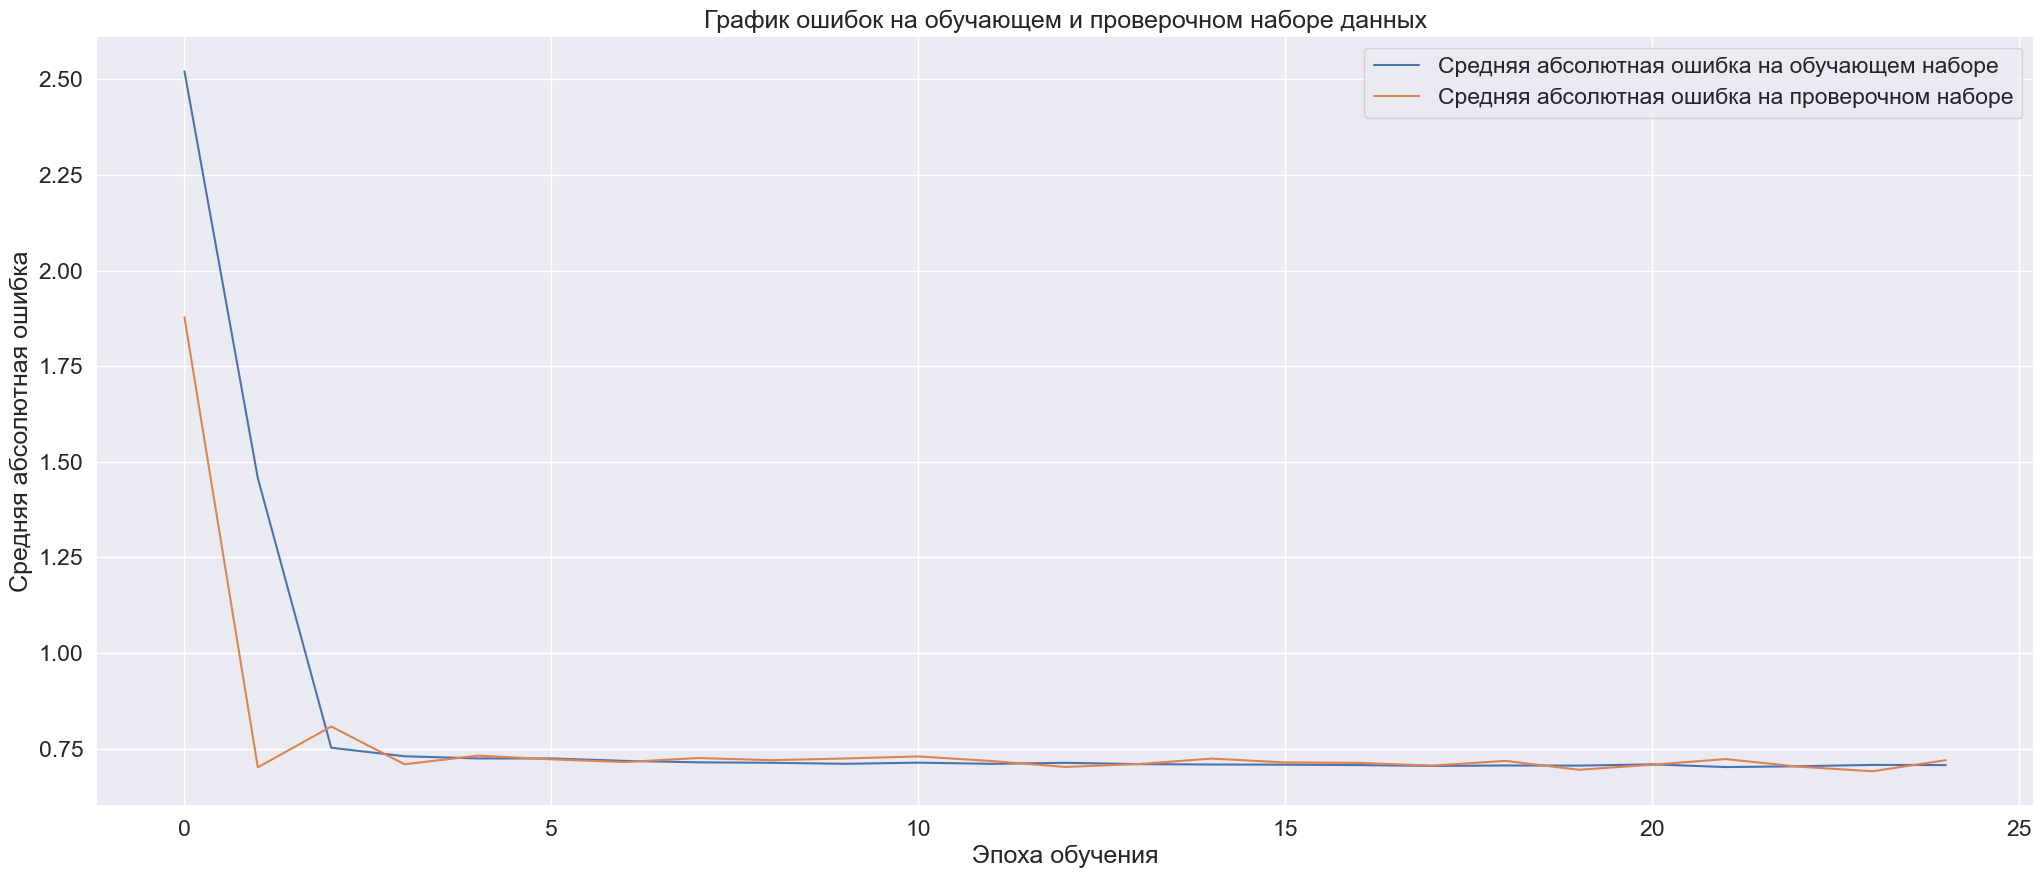

In [126]:
plt.figure(figsize = (25,10))
plt.plot(History.history['loss'], label = 'Средняя абсолютная ошибка на обучающем наборе')
plt.plot(History.history['val_loss'], label = 'Средняя абсолютная ошибка на проверочном наборе')
plt.title('График ошибок на обучающем и проверочном наборе данных')
plt.ylabel('Средняя абсолютная ошибка')
plt.xlabel('Эпоха обучения')
plt.legend()
plt.show()

In [127]:
from sklearn.metrics import mean_absolute_error
print('MAE на тестовой выборке: %.3f' %mean_absolute_error(y_test, Model.predict(x_test_norm)))

MAE на тестовой выборке: 0.750


In [128]:
#input_ = keras.layers.Input(shape=(x_train_norm.shape[1],)) # входной слой
#x = keras.layers.Dense(500, activation='relu')(input_) # полносвязный слой
#x = keras.layers.Dropout(0.4)(x)
#x = keras.layers.Dense(200, activation='relu')(x) # полносвязный слой
#x = keras.layers.Dropout(0.3)(x)
#x = keras.layers.Dense(100, activation='relu')(x) # полносвязный слой
#x = keras.layers.Dropout(0.3)(x)
#x = keras.layers.Dense(50, activation='relu')(x) # полносвязный слой
#x = keras.layers.Dropout(0.3)(x)
#x = keras.layers.Dense(20, activation='relu')(x) # полносвязный слой
#output_ = keras.layers.Dense(1)(x) # выходной слой
#
#model = keras.models.Model(input_, output_) # определем въод и выход моедли
#
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                           patience=6) # ранняя остановка
#reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
#                                              factor=0.25, 
#                                              patience=3, 
#                                              verbose=1) # редактирование скорости обучения
#
#model.compile(loss = 'mse', # определяем метрики и алгоритм оптимизации
#              optimizer = 'adam',
#              metrics = ['mae']
#             )

In [129]:
#history = model.fit(x_train_norm, 
#                    y_train, 
#                    epochs=30,
#                    batch_size=128,
#                    validation_split=0.2,
#                    callbacks = [early_stop, reduce_lr],
#                    shuffle=False
#                   ) # сохраняем историю тренировки

In [130]:
#pd.DataFrame(history.history).iloc[:, :4].plot()

In [131]:
#print('MAE на тестовой выборке: %.3f' %mean_absolute_error(y_test, model.predict(x_test_norm)))

### Сохранение модели

In [132]:
model_json = Model.to_json() # сериализируем модель в json формат
with open("Model/model_task5.json", "w") as json_file:  # записываем в файл
    json_file.write(model_json)

Model.save_weights("Model/model_task5.h5") # сохраняем веса в hdf5 формат
print("Модель сохранена на диск")

Модель сохранена на диск


### Загрузка предобученной модели

In [133]:
# проверим работу сохраненной модели

In [134]:
with open('Model/model_task5.json', 'r') as file:
    loaded_model_json = file.read() # открываем файл и загружаем модель
    
loaded_model = keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("Model/model_task5.h5") # загружаем веса в модель
print("Модель успешно загружена с диска")

Модель успешно загружена с диска


In [135]:
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                896       
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [136]:
# нормировочный коэффициент
df_max_val

3636.8929917828

In [137]:
testX = np.array([[1912.215145, 1056.096385, 87.198840, 21.883152, 252.331069, 781.355358, 71.555460, 2029.147825, 206.428712, 0.145034, 54.138756, 1, 0]])

In [138]:
testX_norm = testX / df_max_val

In [139]:
testX_norm

array([[5.25782625e-01, 2.90384234e-01, 2.39761907e-02, 6.01699089e-03,
        6.93809440e-02, 2.14841448e-01, 1.96748874e-02, 5.57934432e-01,
        5.67596331e-02, 3.98785448e-05, 1.48859909e-02, 2.74959973e-04,
        0.00000000e+00]])

In [140]:
testX_norm.shape

(1, 13)

In [141]:
x_test_norm.shape

(179, 13)

In [142]:
probability_model = keras.Sequential([loaded_model])
predictions = probability_model.predict(testX_norm)

In [143]:
predictions

array([[2.9354708]], dtype=float32)

In [144]:
predictions[0,0]

2.9354708

In [145]:
print('MAE на тестовой выборке: %.3f' %mean_absolute_error(y_test, probability_model.predict(x_test_norm)))

MAE на тестовой выборке: 0.750
